In [ ]:
# 1. Link Colab với GG drive
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive


In [ ]:
# 2. Phân vùng ảnh và các tệp label XML thành 2 thư mục train và test.
# Chia ảnh và tệp label XML tỷ lệ khoảng 90-10 cho từng thư mục.
# Trong mỗi thư mục sẽ chứa các file ảnh kèm theo file label XML tương ứng với ảnh.

In [ ]:
# 3. Convert XML label sang CSV. File CSV lưu trong thư mục split_data
import os
import glob
import pandas as pd
import xml.etree.ElementTree as ET


def xml_to_csv(path):
    xml_list = []
    for xml_file in glob.glob(path + '/*.xml'):
        tree = ET.parse(xml_file)
        root = tree.getroot()
        for member in root.findall('object'):
            value = (root.find('filename').text,
                     int(root.find('size')[0].text),
                     int(root.find('size')[1].text),
                     member[0].text,
                     int(member[4][0].text),
                     int(member[4][1].text),
                     int(member[4][2].text),
                     int(member[4][3].text)
                     )
            xml_list.append(value)
    column_name = ['filename', 'width', 'height', 'class', 'xmin', 'ymin', 'xmax', 'ymax']
    xml_df = pd.DataFrame(xml_list, columns=column_name)
    return xml_df

for directory in ['train','test']:
        image_path = os.path.join('/content/gdrive/MyDrive/data/split_data/{}'.format(directory))
        xml_df = xml_to_csv(image_path)
        xml_df.to_csv('/content/gdrive/MyDrive/data/split_data/{}_labels.csv'.format(directory), index=None)
        print('Successfully converted xml to csv.')

Successfully converted xml to csv.
Successfully converted xml to csv.


In [ ]:
# 4. Tải TF Object Detection APi vào thư mục models
%cd /content/gdrive/MyDrive
!git clone https://github.com/tensorflow/models.git

/content/gdrive/MyDrive
Cloning into 'models'...
remote: Enumerating objects: 97206, done.
remote: Counting objects: 100% (486/486), done.
remote: Compressing objects: 100% (228/228), done.
remote: Total 97206 (delta 283), reused 423 (delta 254), pack-reused 96720
Receiving objects: 100% (97206/97206), 612.89 MiB | 18.41 MiB/s, done.
Resolving deltas: 100% (70701/70701), done.
Updating files: 100% (3700/3700), done.


In [ ]:
# 5. Compile the protos -
# Protocol Buffers (Protobuf) is a free and open-source cross-platform data format used to serialize structured data.
%cd /content/gdrive/MyDrive/models/research
!protoc object_detection/protos/*.proto --python_out=.

/content/gdrive/MyDrive/models/research


In [ ]:
# 6. Cài dặt API
%cd /content/gdrive/MyDrive/models/research
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .

/content/gdrive/MyDrive/models/research
Processing /content/gdrive/MyDrive/models/research
  Preparing metadata (setup.py) ... done
  Using cached avro-python3-1.10.2.tar.gz (38 kB)
  Preparing metadata (setup.py) ... done
  Using cached apache_beam-2.56.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (14.5 MB)
  Using cached lvis-0.5.3-py3-none-any.whl (14 kB)
  Using cached tf_models_official-2.16.0-py2.py3-none-any.whl (2.7 MB)
  Using cached tensorflow_io-0.37.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (49.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.6/116.6 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 23.3 MB/s eta 0:00:00
   

In [ ]:
# 7. CSV to TFRecord. With help from my git hub
%cd /content/gdrive/MyDrive/models/research
!git clone https://github.com/baotoanproject/MY_SSD_TF2_MODEL
!cp MY_SSD_TF2_MODEL/generate_tfrecord.py .
!cp MY_SSD_TF2_MODEL/label_map.txt /content/gdrive/MyDrive/data

if not os.path.exists("/content/gdrive/MyDrive/data/tfrecord_data/"):
  os.mkdir("/content/gdrive/MyDrive/data/tfrecord_data/")

!python generate_tfrecord.py --image_dir=/content/gdrive/MyDrive/data/split_data/train --csv_input=/content/gdrive/MyDrive/data/split_data/train_labels.csv --output_path=/content/gdrive/MyDrive/data/tfrecord_data/train.record
!python generate_tfrecord.py --image_dir=/content/gdrive/MyDrive/data/split_data/test --csv_input=/content/gdrive/MyDrive/data/split_data/test_labels.csv --output_path=/content/gdrive/MyDrive/data/tfrecord_data/test.record

/content/gdrive/MyDrive/models/research
Cloning into 'MY_SSD_TF2_MODEL'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 6), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (27/27), 10.66 KiB | 1.18 MiB/s, done.
Resolving deltas: 100% (6/6), done.
2024-05-17 04:21:28.402438: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 04:21:29.434057: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-17 04:21:30.563579: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA 

In [ ]:
# 8. Download pretrain and config
if not os.path.exists("/content/gdrive/MyDrive/pretrained"):
  os.mkdir("/content/gdrive/MyDrive/pretrained")

%cd /content/gdrive/MyDrive/pretrained
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
# Unzip
!tar -xzvf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz

# Config pipeline.config, label_map.txt if needed


/content/gdrive/MyDrive/pretrained
--2024-05-17 04:10:17--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 142.250.107.207, 173.194.202.207, 173.194.203.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|142.250.107.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20515344 (20M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’

ssd_mobilenet_v2_fp 100%[===================>]  19.56M  71.3MB/s    in 0.3s    

2024-05-17 04:10:17 (71.3 MB/s) - ‘ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz’ saved [20515344/20515344]

ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/checkpoint/che

In [ ]:
# 9. Upload label file object-detection.txt to data folder
%cd /content/gdrive/MyDrive/models
!pip install -r /content/gdrive/MyDrive/models/research/MY_SSD_TF2_MODEL/setup.txt
!pip install --upgrade opencv-python

/content/gdrive/MyDrive/models
ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 10, in <module>
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spinners import open_spinner
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/spinners.py", line 9, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/

In [1]:
# 10. Train
%cd /content/gdrive/MyDrive/models/research
%cp /content/gdrive/MyDrive/models/research/object_detection/model_main_tf2.py .

#train
!python model_main_tf2.py \
--pipeline_config_path=/content/gdrive/MyDrive/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--model_dir=/content/gdrive/MyDrive/output_model --alsologtostderr --num_train_steps=1000

/content/gdrive/MyDrive/models/research
2024-05-17 05:08:56.457656: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 05:08:56.635608: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 05:08:56.652362: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 05:09:00.096064: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-17 05:09:04.414612: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https:

In [2]:
# 11. Export model
%cd /content/gdrive/MyDrive/models/research
%cp /content/gdrive/MyDrive/models/research/object_detection/exporter_main_v2.py .

!python exporter_main_v2.py \
--trained_checkpoint_dir=/content/gdrive/MyDrive/output_model \
--pipeline_config_path=/content/gdrive/MyDrive/pretrained/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8/pipeline.config \
--output_directory=/content/gdrive/MyDrive/export_model

/content/gdrive/MyDrive/models/research
2024-05-17 05:45:02.361547: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 05:45:02.408013: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-17 05:45:02.408607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-17 05:45:03.435604: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-05-17 05:45:06.731129: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https:

In [3]:
# load model
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

#Load model
tf.keras.backend.clear_session()
model = tf.saved_model.load("/content/gdrive/MyDrive/export_model/saved_model")

In [4]:
# Các hàm inference
import cv2
def run_inference_for_single_image(model, image):

  image = np.asarray(image)
  input_tensor = tf.convert_to_tensor(image)
  input_tensor = input_tensor[tf.newaxis,...]

  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy()
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

  if 'detection_masks' in output_dict:
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()

  return output_dict

def load_image_into_numpy_array(path):
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

/content/gdrive/MyDrive/models/research
Done load image 
Done inference
detection_boxes =  [[0.2663566  0.30248326 0.7189812  0.7265759 ]
 [0.25448996 0.32635665 0.7036493  0.7041414 ]
 [0.3217529  0.32277673 0.60182023 0.7216932 ]
 [0.         0.07664919 0.33450308 1.        ]
 [0.4124012  0.2826544  0.65371585 0.7164983 ]
 [0.32549426 0.38410342 0.4935316  0.7152883 ]
 [0.14573479 0.01035172 0.9100708  0.21932805]
 [0.67768663 0.44194    0.9971662  0.52932304]
 [0.         0.20603383 0.18746197 0.31087434]
 [0.6294579  0.82581174 1.         0.90708077]
 [0.6107154  0.84563965 1.         0.9246238 ]
 [0.67572093 0.6950137  1.         0.77912706]
 [0.6576669  0.42544875 0.97972226 0.5094546 ]
 [0.31640953 0.08817762 0.72057515 0.84849274]
 [0.30669698 0.46539745 0.5424871  0.6683831 ]
 [0.         0.38543114 0.30951643 1.        ]
 [0.         0.         0.44077843 1.        ]
 [0.4653711  0.90408087 1.         1.        ]
 [0.28152007 0.45644215 0.64363414 0.6500466 ]
 [0.         0. 

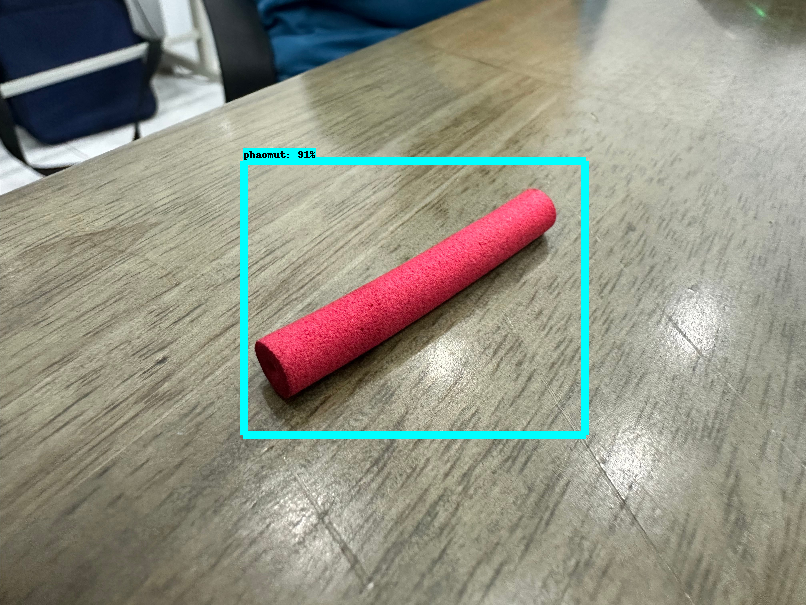

In [19]:
%cd /content/gdrive/MyDrive/models/research
category_index = label_map_util.create_category_index_from_labelmap("/content/gdrive/MyDrive/data/label_map.txt", use_display_name=True)

image_path = '/content/gdrive/MyDrive/data/split_data/train/phao_mut_10.jpeg'
image_np = load_image_into_numpy_array(image_path)
print("Done load image ")
image_np = cv2.resize(image_np, dsize=None, fx=0.2, fy=0.2)
output_dict = run_inference_for_single_image(model, image_np)
print("Done inference")
print("detection_boxes = ",output_dict['detection_boxes'])
print("detection_classes = ", output_dict['detection_classes'])
print("detection_scores = ", output_dict['detection_scores'])
vis_util.visualize_boxes_and_labels_on_image_array(
    image_np,
    output_dict['detection_boxes'],
    output_dict['detection_classes'],
    output_dict['detection_scores'],
    category_index,
    instance_masks=output_dict.get('detection_masks_reframed', None),
    use_normalized_coordinates=True,
    line_thickness=8)
print("Done draw on image ")
display(Image.fromarray(image_np))